In [1]:
file_path = r"C:\Users\DELL\Downloads\Codveta Internship\datasets\iris.csv"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore")


In [3]:
### Load dataset
df = pd.read_csv(file_path)

In [4]:
### display dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
### display dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
### Checking for duplicates in dataset

df.duplicated().sum()

np.int64(3)

In [7]:
### Display the duplicated dataset

df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [8]:
### Droping Duplicate
df.drop_duplicates(inplace=True)

In [9]:
### The dataset structure
print("The number of columns and records in the dataset: ", df.shape)

The number of columns and records in the dataset:  (147, 5)


In [10]:
### Checking for Missing Value

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
### Exploring the each columns
df['species'].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

In [12]:
#### Summary statistics of the numerical variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


In [13]:
#### Checking the correlation of the variables
df.select_dtypes(include='number').corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


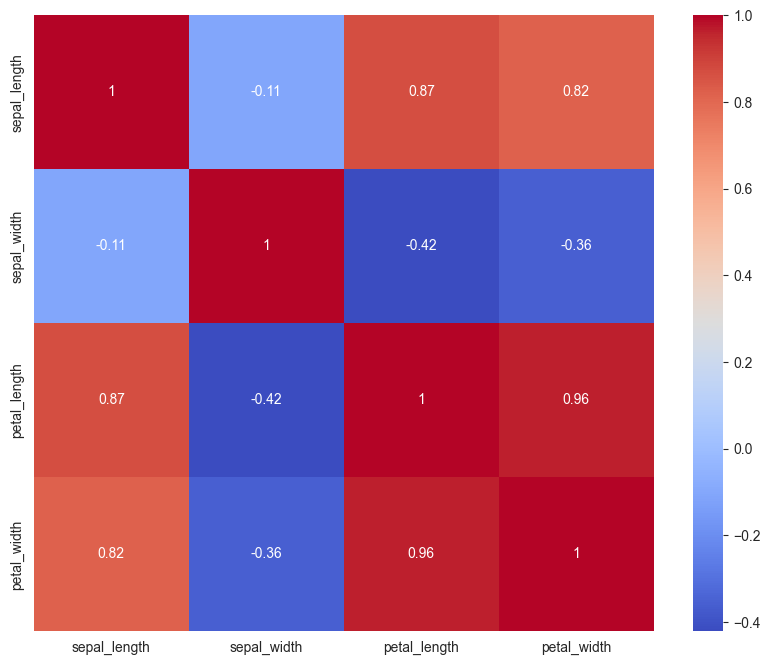

In [14]:
### Plot correlation using seaborn

plt.figure(figsize=(10,8))
sns.heatmap(
    df.select_dtypes(include='number').corr(), annot=True,
    cmap = 'coolwarm'
)
plt.show()

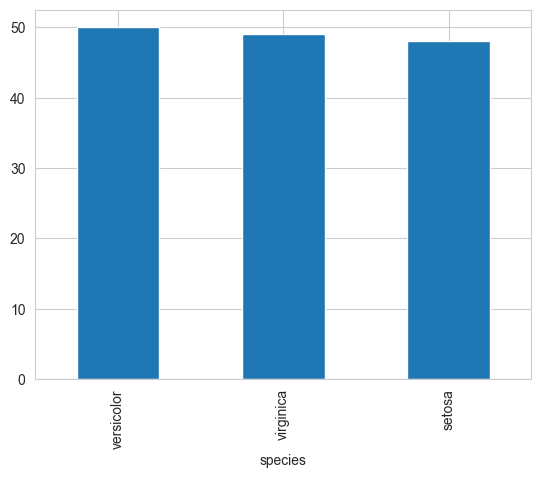

In [20]:
df['species'].value_counts().plot(kind='bar')
plt.show()

In [21]:
### Data preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 

from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage 

In [28]:
df['species'].unique()

array([1, 2, 3])

In [24]:
column = {
    'setosa':1,
    'versicolor':2,
    'virginica':3
}

In [26]:
df['species'] = df['species'].map(column)

In [29]:
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(df)

In [32]:
## Kmean model building

kmeans = KMeans(
    n_clusters = 3,
    random_state = 42
)

In [33]:
df['clusters'] = kmeans.fit_predict(scaled_feature)

In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,1,2
1,4.9,3.0,1.4,0.2,1,2
2,4.7,3.2,1.3,0.2,1,2
3,4.6,3.1,1.5,0.2,1,2
4,5.0,3.6,1.4,0.2,1,2


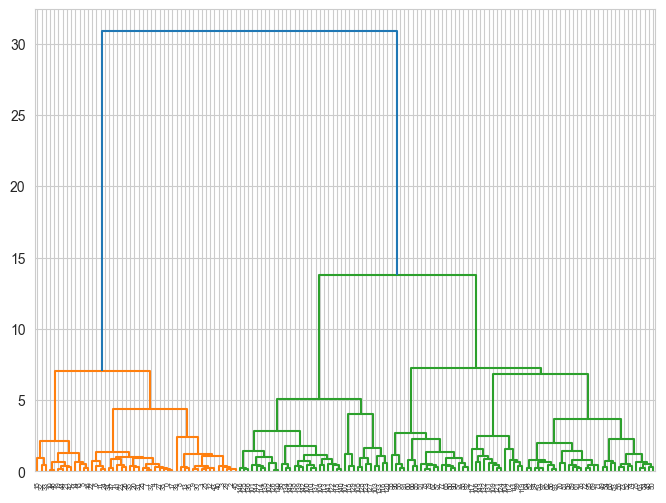

In [36]:
### Hierarchical clustering

linked = linkage(scaled_feature, method='ward')

plt.figure(figsize=(8,6))
dendrogram(linked)
plt.show()

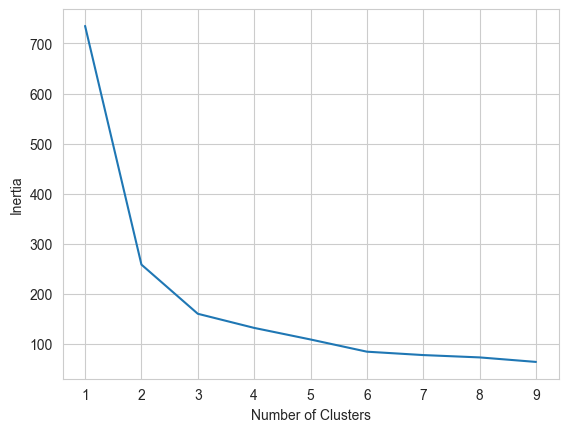

In [37]:
### Using Elbow method to choose K number

inertia = []

for k in range(1,10):
    model  = KMeans(n_clusters = k, random_state=42)
    model.fit(scaled_feature)
    inertia.append(model.inertia_)
plt.plot(range(1,10),inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [38]:
### Uding the principal decomposition to reduce the 4D to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
X_pca = pca.fit_transform(scaled_feature)

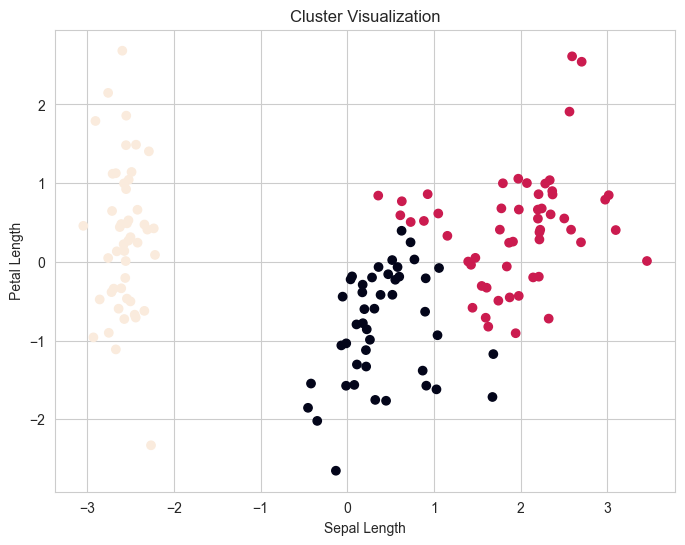

In [41]:
plt.figure(figsize = (8,6))

plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c = df['clusters']
)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Cluster Visualization")

plt.show()